# Cold Magnetized Plasma Waves Tensor Elements (S, D, P in Stix's notation)

This example shows how to calculate the values of the cold plasma tensor elements for various electromagnetic wave frequencies.


Let's assume a magnetized plasma where the DC magnetic field is oriented along the $z$ direction: $\mathbf{B} = B_0 \mathbf{\hat{z}}$. In the cold plasma approximation, the dielectric tensor of the plasma $\mathbf{K}$ can be written as[1,2]: 

![Stix frame](figures/stix_frame.svg)

$$
\mathbf{K}
\doteq
\left(
\begin{array}{ccc}
S & j D & 0 \\
-j D & S & 0 \\
0 & 0 & P
\end{array}
\right)
$$
with
$$
\begin{eqnarray}
S &\doteq& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
D &\doteq& \sum_s \frac{\Omega_{c,s}}{\omega} \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
P &\doteq& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2}
\end{eqnarray}
$$

where the summation is done on all plasma species $s$ and $\omega_{p,s}$ and $\Omega_{c,s}$ are the plasma and the cyclotron frequencies (actually pulsations) for the species $s$  respectively. Stix $S,D,P$ notations are mnemonics for the _Sum_, _Difference_, _Plasma_ terms.

Such media is said to be gyrotropic. If one uses a rotating basis, using the following change of variables:

$$
\begin{eqnarray}
S &\doteq& \frac{1}{2} \left( R + L \right) \\
D &\doteq& \frac{1}{2} \left( R - L \right) \\
\end{eqnarray}
$$
where $R$ and $L$ stands for _Right_ and _Left_, then the dielectric tensor becomes diagonal is this frame.


 [1] Thomas.H. Stix, Waves in Plasmas. New York: American Institute of Physics. 1992.

 [2] D. G. Swanson, Plasma Waves, 2nd ed. (CRC Press, 2003).

Below we plot these quantities using PlasmaPy.

In [1]:
# First, import some basics and PlasmaPy
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u  # units are needed to defined plasma quantities
from plasmapy.physics.dielectric import (cold_plasma_permittivity_SDP,
                                         cold_plasma_permittivity_LRP)

Let's define the magnetic field magnitude and the plasma species and their respective densities:

In [2]:
B = 2 * u.T
species = ['e', 'D+']
n = [1e18 * u.m**-3, 1e18 * u.m**-3]

## Plot S, D, P parameter vs frequency

Let's define a frequency range, here from 1 MHz to 200 GHz:

In [3]:
f = np.logspace(start=6, stop=11.3, num=3001)  # 1 MHz to 200 GHz
omega_RF = f * (2 * np.pi) * (u.rad / u.s)

Now we have all the elements to calculate the Stix parameters S, D and P: 

In [4]:
S, D, P = cold_plasma_permittivity_SDP(B, species, n, omega_RF)

Note that passing parameter without using will raise a warning: 

In [5]:
_, _ , _ = cold_plasma_permittivity_SDP(2, species, n, 2*np.pi*f)

                To silence this warning, explicitly pass in an Astropy Quantity (from astropy.units)
                (see http://docs.astropy.org/en/stable/units/) [plasmapy.utils.checks]
 1.24857088e+12 1.25366029e+12] in cold_plasma_permittivity_SDP. Assuming units of rad / s.
                To silence this warning, explicitly pass in an Astropy Quantity (from astropy.units)
                (see http://docs.astropy.org/en/stable/units/) [plasmapy.utils.checks]


Before plotting them against the frequency, let's filter positive and negative values, in order to display these signs in way compatible with log plots.

In [6]:
# Filter positive and negative values, for display purposes in log scale only.
# Still for display purposes in log scale, replace 0 by NaN to NOT plot 0 values
S_pos = S * (S > 0)
D_pos = D * (D > 0)
P_pos = P * (P > 0)
S_neg = S * (S < 0)
D_neg = D * (D < 0)
P_neg = P * (P < 0)
S_pos[S_pos == 0] = np.NaN
D_pos[D_pos == 0] = np.NaN
P_pos[P_pos == 0] = np.NaN
S_neg[S_neg == 0] = np.NaN
D_neg[D_neg == 0] = np.NaN
P_neg[P_neg == 0] = np.NaN

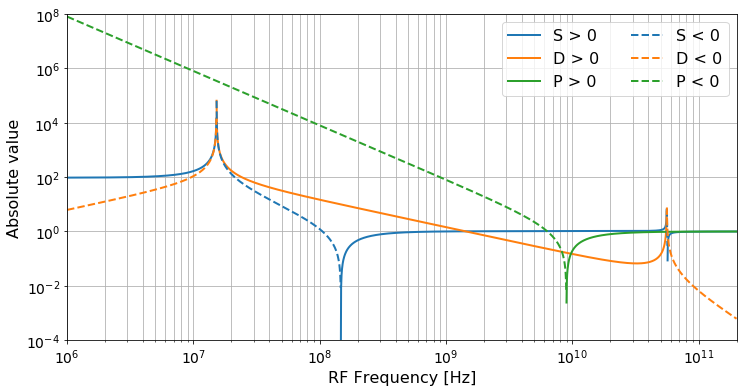

In [7]:
plt.figure(figsize=(12, 6))
plt.semilogx(f, abs(S_pos),
             f, abs(D_pos),
             f, abs(P_pos), lw=2)
plt.semilogx(f, abs(S_neg), 'C0',
             f, abs(D_neg), 'C1',
             f, abs(P_neg), 'C2', lw=2, ls='--')
plt.yscale('log')
plt.grid(True, which='both')
plt.ylim(1e-4, 1e8)
plt.xlim(1e6, 200e9)
plt.legend(('S > 0', 'D > 0', 'P > 0', 'S < 0', 'D < 0', 'P < 0'),
           fontsize=16, ncol=2)
plt.xlabel('RF Frequency [Hz]', size=16)
plt.ylabel('Absolute value', size=16)
plt.tick_params(labelsize=14)

## Cold Plasma tensor elements in the rotating basis

In [8]:
L, R, P = cold_plasma_permittivity_LRP(B, species, n, omega_RF)

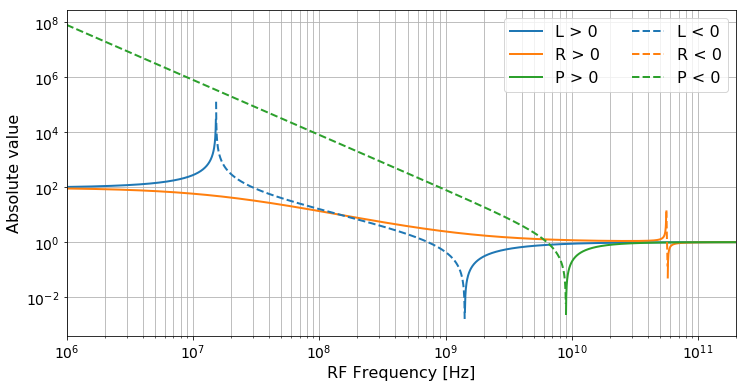

In [9]:
L_pos = L * (L > 0)
R_pos = R * (R > 0)
L_neg = L * (L < 0)
R_neg = R * (R < 0)
L_pos[L_pos == 0] = np.NaN
R_pos[R_pos == 0] = np.NaN
L_neg[L_neg == 0] = np.NaN
R_neg[R_neg == 0] = np.NaN

plt.figure(figsize=(12, 6))
plt.semilogx(f, abs(L_pos),
             f, abs(R_pos),
             f, abs(P_pos), lw=2)
plt.semilogx(f, abs(L_neg), 'C0',
             f, abs(R_neg), 'C1',
             f, abs(P_neg), 'C2', lw=2, ls='--')
plt.yscale('log')
plt.grid(True, which='both')
plt.xlim(1e6, 200e9)
plt.legend(('L > 0', 'R > 0', 'P > 0', 'L < 0', 'R < 0', 'P < 0'),
           fontsize=16, ncol=2)
plt.xlabel('RF Frequency [Hz]', size=16)
plt.ylabel('Absolute value', size=16)
plt.tick_params(labelsize=14)